## part 2

In [1]:
from keras.datasets import boston_housing
from keras.layers import Dense
from keras.layers import Dropout
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [4]:
def model1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [5]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 20
all_mse = []
for i in range(k):
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = model1()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse = history.history['loss']
    all_mse.append(mse)
    print('k = ', i)
    print('MSE: ', mse)

k =  0
MSE:  [192.3809709103348, 25.019178568214517, 19.07579924827739, 16.54963091129345, 14.384110251683634, 13.87515034676711, 13.15383822313011, 12.061636638193574, 11.53137270107503, 11.398544764356902, 10.645747377709016, 10.926641562995648, 9.960936316862458, 10.615113403083372, 9.515874068918013, 9.811349114523422, 9.582434623703843, 8.94033506730246, 9.300290071738615, 8.860867946480939]
k =  1
MSE:  [185.04622614455914, 28.34494382302524, 20.697699797611588, 17.585358522988027, 15.887035396782576, 14.50893197561431, 13.352477976048249, 12.849644942167718, 12.292324120836064, 11.223283612607892, 10.796552622818457, 10.652357014602387, 10.370165493046512, 9.854436932789483, 10.474255542409962, 9.879470810253926, 9.55021676179007, 9.85379376239735, 9.701339001574874, 9.32022961587183]
k =  2
MSE:  [163.2524252179954, 24.677194156736633, 17.877981679195987, 15.49850696562915, 14.396175696663263, 12.66181419619144, 12.510225018745517, 11.840310482533514, 11.244474663934064, 10.439

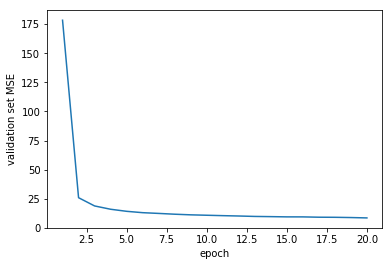

In [6]:
average_mse = [np.mean([x[i] for x in all_mse]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse) + 1), average_mse)
plt.xlabel('epoch')
plt.ylabel('validation set MSE')
plt.show()

In [7]:
min(average_mse)

8.485911535879362

In [8]:
# more epochs
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse2 = []
for i in range(k):
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = model1()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse2 = history.history['loss']
    all_mse2.append(mse2)
    print('k = ', i)

k =  0
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


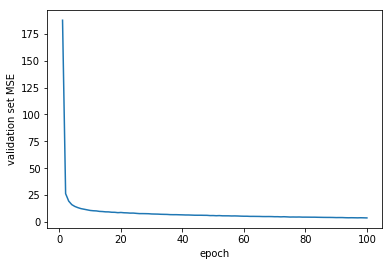

In [9]:
average_mse2 = [np.mean([x[i] for x in all_mse2]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse2) + 1), average_mse2)
plt.xlabel('epoch')
plt.ylabel('validation set MSE')
plt.show()

In [10]:
min(average_mse2)

3.81541455489545

In [11]:
# implement dropout
def model2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [12]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse3 = []
for i in range(k):
    print('k = ', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = model2()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse3 = history.history['loss']
    all_mse3.append(mse3)

k =  0
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


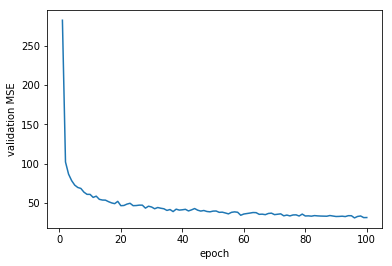

In [13]:
average_mse3 = [np.mean([x[i] for x in all_mse3]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse3) + 1), average_mse3)
plt.xlabel('epoch')
plt.ylabel('validation MSE')
plt.show()

In [14]:
min(average_mse3)

30.94259649584501

In [15]:
# regularization
def model3():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001),
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [16]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse4 = []
for i in range(k):
    print('k = ', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = model3()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse4 = history.history['loss']
    all_mse4.append(mse4)

k =  0
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


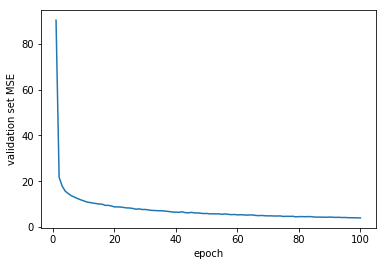

In [17]:
average_mse4 = [np.mean([x[i] for x in all_mse4]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse4) + 1), average_mse4)
plt.xlabel('epoch')
plt.ylabel('validation set MSE')
plt.show()

In [19]:
min(average_mse4)

4.006326791349348

It seems that model1 with epochs=100 has the best performance so far, so this is my final model.

In [20]:
model = model1()
history = model.fit(train_data, train_targets, epochs=100, batch_size=1)

Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 166.4258
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 26.7794
Epoch 3/100
404/404 [==============================] - 1s 3ms/step - loss: 19.0591
Epoch 4/100
404/404 [==============================] - 1s 3ms/step - loss: 16.4586
Epoch 5/100
404/404 [==============================] - 1s 3ms/step - loss: 15.1173
Epoch 6/100
404/404 [==============================] - 1s 3ms/step - loss: 13.6402
Epoch 7/100
404/404 [==============================] - 1s 3ms/step - loss: 12.4003
Epoch 8/100
404/404 [==============================] - 1s 3ms/step - loss: 12.0549
Epoch 9/100
404/404 [==============================] - 1s 3ms/step - loss: 10.6428
Epoch 10/100
404/404 [==============================] - 1s 3ms/step - loss: 10.6210
Epoch 11/100
404/404 [==============================] - 1s 3ms/step - loss: 9.7901
Epoch 12/100
404/404 [==============================] - 1s 3ms/step - loss: 9.7058
Ep

404/404 [==============================] - 1s 3ms/step - loss: 3.5410
Epoch 100/100
404/404 [==============================] - 1s 3ms/step - loss: 4.0403


In [21]:
test_mse_score = model.evaluate(test_data, test_targets)
print("test mse score is ", test_mse_score)

102/102 [==============================] - 0s 4ms/step
test mse score is  12.6289810479856
